Alex Beckwith

Math 839 - Fall 21

HW 6

As usual, we need to import the packages we'll be using in this notebook. 
The convention is to import everything at the top.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.outliers_influence import OLSInfluence as inf

Here, we're using pandas to read the data and create a DataFrame object from the .csv file.
We then use the head() method to check out the first five lines, which helps us get a sense of what we're dealing with.

In [2]:
coal = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw6/BelleAyr_MPV.csv")
coal.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,36.98,5.1,400,51.37,4.24,1484.83,2227.25,2.06
1,13.74,26.4,400,72.33,30.87,289.94,434.90,1.33
2,10.08,23.8,400,71.44,33.01,320.79,481.19,0.97
3,8.53,46.4,400,79.15,44.61,164.76,247.14,0.62
4,36.42,7.0,450,80.47,33.84,1097.26,1645.89,0.22


In order to interact correctly with statsmodels, we must separate the factor values from the response values. Naturally, we'll represent these with X and y.

In [3]:
y = coal.loc[:,"Y"]
X = coal.loc[:,"X1"::]

Here, we fit the model, display, and discuss the results. 

a.

In [11]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              28.24
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                    4.89e-09
Time:                        19:47:55   Log-Likelihood:                         -97.961
No. Observations:                  27   AIC:                                      209.9
Df Residuals:                      20   BIC:                                      219.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.0227      0.258     -0.088      0.931      -0.560       0.515
X2            -0.0293      0.094     -0.313      0.758      -0.225       0.166
X3             0.3350      0.558      0.600      0.555      -0.830       1.500
X4            -0.2932      0.323     -0.909      0.374      -0.966       0.380
X5            -0.0027      0.010     -0.286      0.778      -0.023       0.017
X6             0.0189      0.008      2.363      0.028       0.002       0.036
X7             1.9504      1.086      1.797      0.088      -0.314       4.215
==============================================================================
Omnibus:                        0.645   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.053
Skew:                          -0.012   Prob(JB):                        0.974
Kurtosis:                       3.216   Cond. No.                         776.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Below, we use matplotlib to plot the residuals. There doesn't seem to be a great fit, with some linear looking trends which, when combined with the high p values of the t tests for the regressors, indicates that there is refining of the model which could be done.

Text(0.5, 1.0, 'Actual by Predicted')

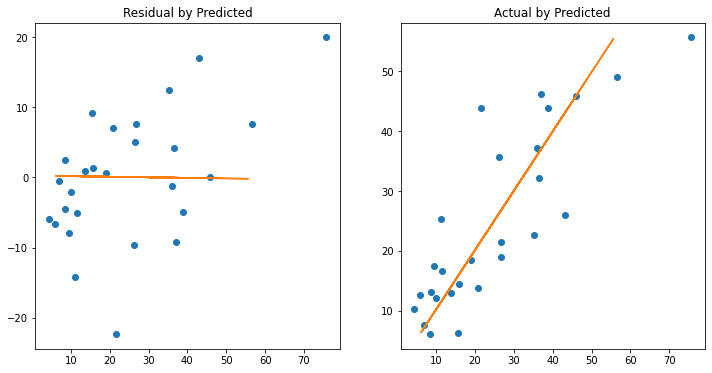

In [7]:
#Residuals and predicted values
resid = model.resid
pred = model.predict(X)

#These four lines describe two functions for displaying the fitted lines on the plots. 
coef_res = np.polyfit(pred,resid,1)
poly1d_res = np.poly1d(coef_res)

coef_act = np.polyfit(pred,y,1)
poly1d_act = np.poly1d(coef_act)

#Matplotlib arranges things using a figure and subplots. Here is a figure with two subplots. 
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(y,resid,"o",label="data")
axs[0].plot(pred,poly1d_res(pred))
axs[0].set_title("Residual by Predicted")

axs[1].plot(y,pred,"o",label="data")
axs[1].plot(pred,poly1d_act(pred))
axs[1].set_title("Actual by Predicted")

An effect leverage plot weighs a point's normalized residual to its influence on the model. The point at index 13 [row 14] appears to have an outsided effect on the model proportional to its influence.

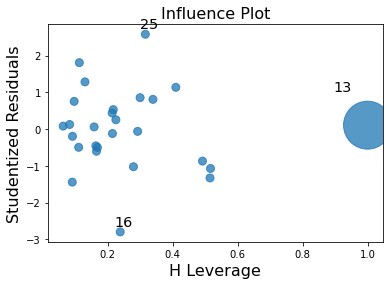

In [10]:
influence = sm.graphics.influence_plot(model)

b.

Here, we examine the scatterplot matrix and comment on possible sources of multicolinearity.
-The regressors X5 and X6 appear to be almost perfectly correlated aside from a single point (which happens to be the index[13] row that we pointed out as a possible outlier earlier).
-X1 appears to be almost perfectly correlated with both X5 and X6, but reciprocally. 
-X3 and X4 seem to be weakly but definitively correlated.

Is there a simple way to mitigate the multicolinearity in this case?
-Yes, there is. If the case were less severe, I would recommend weighing regressors based on their values for multiconlinearity. 
-In this case, I would scrap X1 and X6 entirely. I did some transformations (scaling and reciprocal(X1) and found that all three were essentially the same data, with X1 having very slight deviations from X5 and X6 once transformed. I would drop X1 and X6 because not only would there be virtually no data loss, but there would be fewer transformations necessary on top of the simplified model.

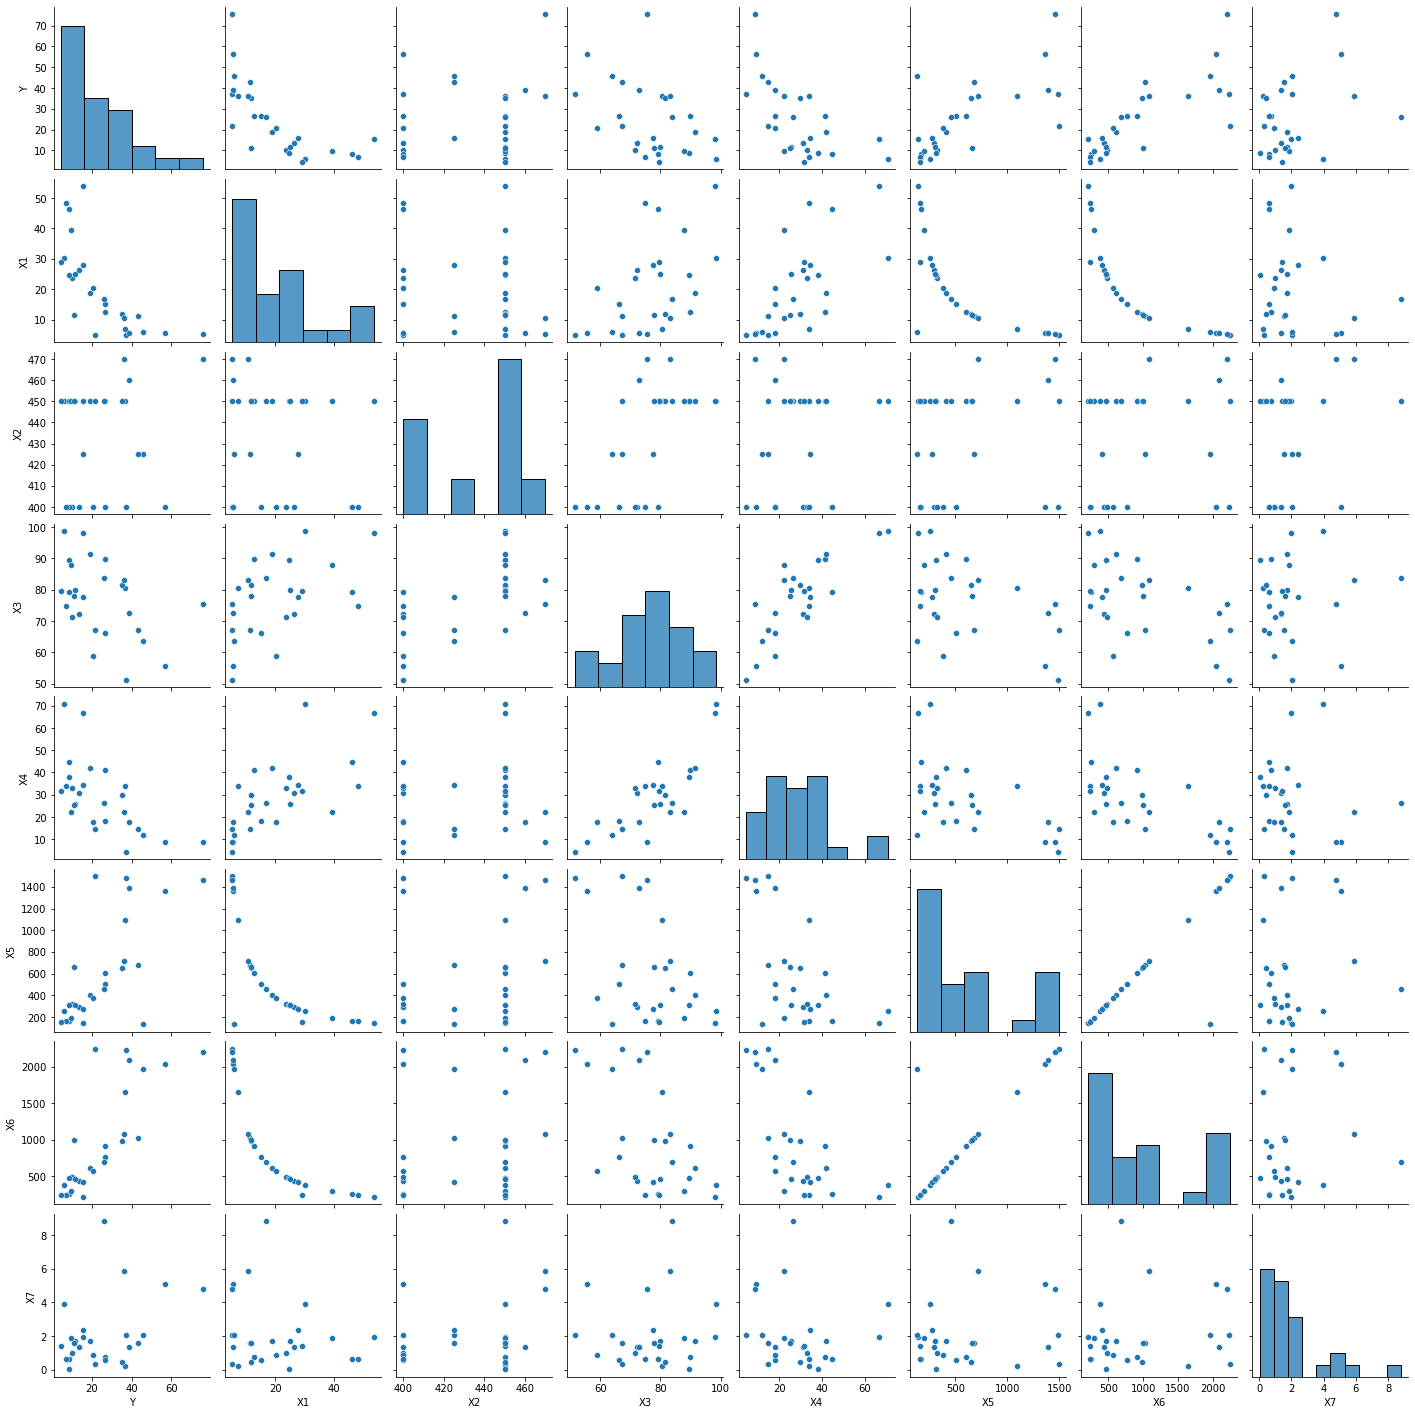

In [20]:
pair = sns.pairplot(coal)

This bit shows the degree to which X1, X5, and X6 are similar post transformation.

In [16]:
coal = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw6/BelleAyr_MPV.csv")

coal["X1"]=coal["X1"].transform(lambda x: 1/x)
coal["X1"]=coal["X1"].transform(lambda x: x/max(coal["X1"])).round(3)
coal["X5"]=coal["X5"].transform(lambda x: x/max(coal["X5"])).round(3)
coal["X6"]=coal["X6"].transform(lambda x: x/max(coal["X6"])).round(3)

for i in range(len(coal["X5"])):
    print(coal["X1"][i],coal["X5"][i],coal["X6"][i],"\n")

1.0 0.992 0.992 

0.193 0.194 0.194 

0.214 0.214 0.214 

0.11 0.11 0.11 

0.729 0.733 0.733 

0.405 0.404 0.404 

0.27 0.271 0.271 

0.169 0.17 0.17 

0.095 0.095 0.095 

0.911 0.91 0.91 

0.338 0.339 0.339 

0.251 0.252 0.252 

0.105 0.106 0.106 

0.879 0.087 0.874 

0.455 0.456 0.456 

0.183 0.183 0.183 

1.0 1.0 1.0 

0.436 0.436 0.436 

0.305 0.306 0.306 

0.206 0.209 0.209 

0.205 0.205 0.205 

0.129 0.129 0.129 

0.176 0.104 0.104 

0.927 0.93 0.93 

0.443 0.443 0.443 

0.981 0.978 0.978 

0.481 0.481 0.481 



This part exists to reload the data and refit the model to negate the transformations. 

In [17]:
coal = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw6/BelleAyr_MPV.csv")
y = coal.loc[:,"Y"]
X = coal.loc[:,"X1"::]
model = sm.OLS(y,X).fit()

c. Comment on the VIF values.

We've previous discussed how VIFs over 5 likely indicate significant multicolinearity. Suffice it to say, values in the hundreds are pretty large indicators.

In [19]:
varif = pd.DataFrame()
varif["VIF"] = [vif(X.values,i) for i in range(X.shape[1])]
varif["Features"] = X.columns
print(varif.round(1))

     VIF Features
0    9.6       X1
1  400.6       X2
2  454.3       X3
3   26.4       X4
4   12.5       X5
5   21.8       X6
6    2.3       X7


d. Here are the requested values displayed in a table.

In [21]:
#Obtain the RStudent, Hats, Cook’s DF, DFFITS, and COVRATIO.  
results = sm.OLS(y,X).fit()
var_figs = inf(results)
rstudents = var_figs.resid_studentized
hat_diag_factor = var_figs.hat_diag_factor
hat_matrix_diag = var_figs.hat_matrix_diag
cooks = var_figs.cooks_distance
dffits = var_figs.dffits
covratio = var_figs.cov_ratio

covar_figs = pd.DataFrame()

covar_figs["R-Students"]=rstudents
covar_figs["Hat Diag Factor"]=hat_diag_factor
covar_figs["Hat Matrix Diag"] = hat_matrix_diag
covar_figs["Cook's D1"]=cooks[0]
covar_figs["Cook's D2"]=cooks[1]
covar_figs["DFFits1"]=dffits[0]
covar_figs["DFFits2"]=dffits[1]
covar_figs["Cov Ratio"]=covratio
print(covar_figs)


    R-Students  Hat Diag Factor  Hat Matrix Diag     Cook's D1     Cook's D2  \
0    -1.021273     3.874452e-01         0.279251  5.772927e-02  9.996146e-01   
1     0.084549     6.696405e-02         0.062761  6.838498e-05  1.000000e+00   
2    -0.199753     1.006180e-01         0.091420  5.735407e-04  1.000000e+00   
3     0.262158     2.904504e-01         0.225077  2.851667e-03  1.000000e+00   
4     0.448796     2.717068e-01         0.213655  7.818087e-03  9.999996e-01   
5     0.541699     2.773101e-01         0.217105  1.162476e-02  9.999983e-01   
6     0.062573     1.878650e-01         0.158154  1.050791e-04  1.000000e+00   
7    -0.875211     9.677275e-01         0.491800  1.058963e-01  9.972822e-01   
8     1.129952     6.940760e-01         0.409708  1.265987e-01  9.952754e-01   
9     0.862397     4.278589e-01         0.299651  4.545865e-02  9.998255e-01   
10    0.763923     1.069357e-01         0.096605  8.915047e-03  9.999993e-01   
11    0.817533     5.132803e-01         

e. As previously stated, observation 14 (index[13]) appeared to be overly influential to the point of being considered an outlier. In terms of the values above:

RStudents
- The studentized residual is the difference from the expected value of a point proportional to an estimate of the standard deviation. In this case, the RStudents is small compared to many of the other points, meaning that if the results were normally distributed, this point would not have a significant impact on the formulation of the model. 

Hats

-The hat matrix is a way to estimate the influence that particular points have on a regression. Depending on the case, points above 0.2 or 0.5 might be considered highly influential, with the maximum value being 1.0. Our suspect point has a value of 1.0, with an incredibly small factor value, indicating the probability of its insignificance.

Cook's D

-The Cook's Distances are methods of calculating the influence of particular points by measuring the average change to the fit of the model when other points are removed. Our point is the smallest in terms of average change, (D1) with an infinitesimally small probability of not being an outlier (D2).

Dffits

-Dffits is similar to Cook's, but measures the change in the actual model's valuation when particular points are removed. Our boy is orders of magnitude above the rest here, indicating some pretty big shifts without its influence. 

CovRatio

-The covratio measures the change in the determinant of the covariance matrix when the ith term is deleted. Yet again, our point comes out on top. In this case, by being the smallest. 

f. & g. One only needs to look at the orders of magnitude involved to see observation index[13] pop out as an outsided influential points in X5 and X6.

In [23]:
#get dfbetas
dfbetas = pd.DataFrame(var_figs.dfbetas)
print(dfbetas)

           0         1         2         3            4            5         6
0  -0.201535 -0.176211  0.242031 -0.128251    -0.200011    -0.029221 -0.038870
1   0.000156  0.010876 -0.009204  0.004787     0.000322    -0.007755 -0.001495
2   0.016348 -0.044627  0.040984 -0.034301    -0.001171     0.026279  0.007644
3   0.102182 -0.014547 -0.003825  0.008301     0.003081     0.035397 -0.012685
4  -0.072450 -0.043258  0.038591  0.049020     0.042393     0.029458 -0.110834
5  -0.143972 -0.101899  0.125915 -0.011976     0.006821     0.005764 -0.116367
6  -0.011644 -0.011021  0.013835 -0.004313    -0.000780    -0.000319 -0.005934
7   0.227276 -0.106389  0.209421 -0.603457     0.036994    -0.036043 -0.318810
8   0.518323 -0.208758  0.026733  0.266335    -0.006891     0.337155  0.128641
9   0.138595  0.132500 -0.205440  0.150117     0.140958     0.020461  0.337196
10 -0.076454  0.105756 -0.053220 -0.033206     0.021029    -0.119181 -0.105962
11 -0.119621  0.532177 -0.481213  0.247836     0.021

h. Here is the refitted model.

In [35]:
coal = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw6/BelleAyr_MPV.csv")
coal = coal.drop(13,axis=0)
print(coal)

y = coal.loc[:,"Y"]
X = coal.loc[:,"X1"::]

model = sm.OLS(y,X).fit()
model.summary()

        Y    X1   X2     X3     X4       X5       X6    X7
0   36.98   5.1  400  51.37   4.24  1484.83  2227.25  2.06
1   13.74  26.4  400  72.33  30.87   289.94   434.90  1.33
2   10.08  23.8  400  71.44  33.01   320.79   481.19  0.97
3    8.53  46.4  400  79.15  44.61   164.76   247.14  0.62
4   36.42   7.0  450  80.47  33.84  1097.26  1645.89  0.22
5   26.59  12.6  450  89.90  41.26   605.06   907.59  0.76
6   19.07  18.9  450  91.48  41.88   405.37   608.05  1.71
7    5.96  30.2  450  98.60  70.79   253.70   380.55  3.93
8   15.52  53.8  450  98.05  66.82   142.27   213.40  1.97
9   56.61   5.6  400  55.69   8.92  1362.24  2043.36  5.08
10  26.72  15.1  400  66.29  17.98   507.65   761.48  0.60
11  20.80  20.3  400  58.94  17.79   377.60   566.40  0.90
12   6.99  48.4  400  74.74  33.94   158.05   237.08  0.63
14  43.09  11.2  425  67.14  14.73   682.59  1023.89  1.57
15  15.79  27.9  425  77.65  34.49   274.20   411.30  2.38
16  21.60   5.1  450  67.22  14.48  1496.51  2244.77  0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              24.29
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                    3.33e-08
Time:                        20:54:52   Log-Likelihood:                         -94.815
No. Observations:                  26   AIC:                                      203.6
Df Residuals:                      19   BIC:                                      212.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.0167      0.270     -0.062      0.951      -0.582       0.548
X2            -0.0288      0.096     -0.300      0.768      -0.230       0.173
X3             0.3347      0.573      0.584      0.566      -0.864       1.533
X4            -0.3012      0.339     -0.888      0.386      -1.011       0.409
X5            79.2469    731.499      0.108      0.915   -1451.799    1610.293
X6           -52.8141    487.666     -0.108      0.915   -1073.511     967.882
X7             1.9146      1.161      1.649      0.116      -0.516       4.345
==============================================================================
Omnibus:                        0.508   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.020
Skew:                          -0.009   Prob(JB):                        0.990
Kurtosis:                       3.135   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. With index[13] gone, there aren't any more outlandishly significant rows to peg as outliers.

Points I'm still suspicious of are index[7] and index[18] because of their high hat matrix diagonal values. Those two don't appear to be as obviously outliers because of their lack of standing out against other rows in other metrics.

When it comes to changes to the model, I'm not surprised to see that X5 and X6 were the only regressors to undergo a significant change to their standard errors and estimates. That's not suprising given those were the factors whose scatterplots most clearly indicated index[13] as an outlier. Perhaps a better method of controlling for that outlier would have been interpolation. That is, if the multicolinearity of X1, X5, and X6 didn't warrant the exclusion of 2/3 entire columns. 

Model 1
coef	std err	t	P>|t|	[0.025	0.975]
X1	-0.0227	0.258	-0.088	0.931	-0.560	0.515
X2	-0.0293	0.094	-0.313	0.758	-0.225	0.166
X3	0.3350	0.558	0.600	0.555	-0.830	1.500
X4	-0.2932	0.323	-0.909	0.374	-0.966	0.380
X5	-0.0027	0.010	-0.286	0.778	-0.023	0.017
X6	0.0189	0.008	2.363	0.028	0.002	0.036
X7	1.9504	1.086	1.797	0.088	-0.314	4.215


Model 2
coef	std err	t	P>|t|	[0.025	0.975]
X1	-0.0167	0.270	-0.062	0.951	-0.582	0.548
X2	-0.0288	0.096	-0.300	0.768	-0.230	0.173
X3	0.3347	0.573	0.584	0.566	-0.864	1.533
X4	-0.3012	0.339	-0.888	0.386	-1.011	0.409
X5	79.2469	731.499	0.108	0.915	-1451.799	1610.293
X6	-52.8141	487.666	-0.108	0.915	-1073.511	967.882
X7	1.9146	1.161	1.649	0.116	-0.516	4.345



In [36]:
#Obtain the RStudent, Hats, Cook’s DF, DFFITS, and COVRATIO.  
var_figs = inf(model)
rstudents = var_figs.resid_studentized
hat_diag_factor = var_figs.hat_diag_factor
hat_matrix_diag = var_figs.hat_matrix_diag
cooks = var_figs.cooks_distance
dffits = var_figs.dffits
covratio = var_figs.cov_ratio

covar_figs = pd.DataFrame()

covar_figs["R-Students"]=rstudents
covar_figs["Hat Diag Factor"]=hat_diag_factor
covar_figs["Hat Matrix Diag"] = hat_matrix_diag
covar_figs["Cook's D1"]=cooks[0]
covar_figs["Cook's D2"]=cooks[1]
covar_figs["DFFits1"]=dffits[0]
covar_figs["DFFits2"]=dffits[1]
covar_figs["Cov Ratio"]=covratio
print(covar_figs)

    R-Students  Hat Diag Factor  Hat Matrix Diag  Cook's D1  Cook's D2  \
0    -0.990840         0.393067         0.282160   0.055129   0.999663   
1     0.031755         0.439071         0.305107   0.000063   1.000000   
2    -0.176203         0.149490         0.130049   0.000663   1.000000   
3     0.248460         0.297139         0.229073   0.002620   1.000000   
4     0.434841         0.272606         0.214211   0.007364   1.000000   
5     0.534584         0.280853         0.219271   0.011466   0.999998   
6     0.042227         0.227498         0.185335   0.000058   1.000000   
7    -0.881033         1.322375         0.569406   0.146636   0.992531   
8     1.101230         0.758009         0.431175   0.131320   0.994646   
9     0.836504         0.431320         0.301344   0.043116   0.999851   
10    0.763368         0.123164         0.109658   0.010253   0.999999   
11    0.789779         0.548753         0.354319   0.048898   0.999774   
12   -0.050487         0.424868       

j. The VIF values are way larger! It's also eerie to see the exact same values for X5 and X6. It seems like outliers might hamper the effectiveness of other measures by throwing noise into the mix where there needn't be as much.

In [38]:
varif = pd.DataFrame()
varif["VIF"] = [vif(X.values,i) for i in range(X.shape[1])]
varif["Features"] = X.columns
print(varif.round(1))

            VIF Features
0  1.000000e+01       X1
1  3.872000e+02       X2
2  4.430000e+02       X3
3  2.760000e+01       X4
4  6.915422e+10       X5
5  6.915422e+10       X6
6  2.500000e+00       X7


Problem 2.

In [44]:
wine = pd.read_csv("/Users/Fr333y3d3a/Documents/School/952986478/MATH839 Applied Regression Analysis/hw6/Hmwk 6.2.csv")
wine.head()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
0,1.0,3.3,2.8,3.1,4.1,9.8,1
1,1.0,4.4,4.9,3.5,3.9,12.6,1
2,1.0,3.9,5.3,4.8,4.7,11.9,1
3,1.0,3.9,2.6,3.1,3.6,11.1,1
4,1.0,5.6,5.1,5.5,5.1,13.3,1


In [46]:
y = wine.loc[:,"Quality"]
X = wine.loc[:,["Flavor","Region"]]
X = pd.get_dummies(X, columns=["Region"])
print(X)

    Flavor  Region_1  Region_2  Region_3
0      3.1         1         0         0
1      3.5         1         0         0
2      4.8         1         0         0
3      3.1         1         0         0
4      5.5         1         0         0
5      5.0         1         0         0
6      4.8         1         0         0
7      4.3         1         0         0
8      3.9         0         0         1
9      4.7         1         0         0
10     4.5         0         0         1
11     4.3         0         1         0
12     7.0         0         0         1
13     6.7         0         0         1
14     5.8         0         0         1
15     5.6         0         0         1
16     4.8         0         0         1
17     5.5         0         0         1
18     4.3         1         0         0
19     3.4         0         1         0
20     6.6         0         0         1
21     5.3         0         0         1
22     5.0         0         1         0
23     4.1      

a. After creating dummy variables for the regions, the p values for the t tests clearly indicate that region does have a significant impact on wine quality. 

In [47]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     53.13
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.36e-13
Time:                        21:25:39   Log-Likelihood:                -47.576
No. Observations:                  38   AIC:                             103.2
Df Residuals:                      34   BIC:                             109.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Flavor         1.1155      0.174      6.417      0.000       0.762       1.469
Region_1       7.0943      0.791      8.967      0.000       5.486       8.702
Region_2       5.5608      0.817      6.803      0.000       3.900       7.222
Region_3       8.3177      1.010      8.235      0.000       6.265      10.370
==============================================================================
Omnibus:                        0.226   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.107
Skew:                           0.121   Prob(JB):                        0.948
Kurtosis:                       2.906   Cond. No.                         50.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. When looking at theresidual scatterplots, the values aren't great, but they are sufficiently noisy to not necessarily suspect multicoliearity off the bat.

Text(0.5, 1.0, 'Actual by Predicted')

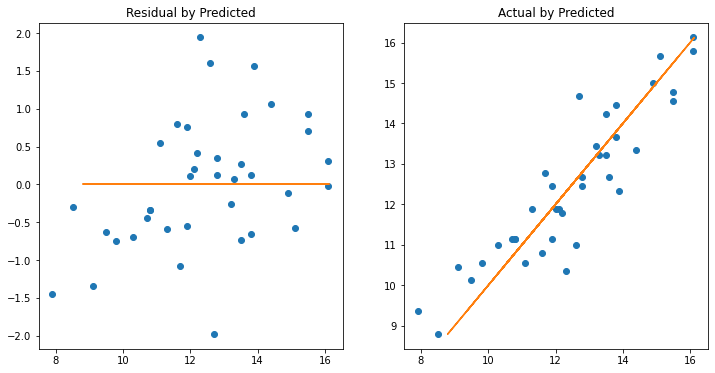

In [48]:
#Residuals and predicted values
resid = model.resid
pred = model.predict(X)

#These four lines describe two functions for displaying the fitted lines on the plots. 
coef_res = np.polyfit(pred,resid,1)
poly1d_res = np.poly1d(coef_res)

coef_act = np.polyfit(pred,y,1)
poly1d_act = np.poly1d(coef_act)

#Matplotlib arranges things using a figure and subplots. Here is a figure with two subplots. 
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(y,resid,"o",label="data")
axs[0].plot(pred,poly1d_res(pred))
axs[0].set_title("Residual by Predicted")

axs[1].plot(y,pred,"o",label="data")
axs[1].plot(pred,poly1d_act(pred))
axs[1].set_title("Actual by Predicted")

 b & c.
 
Points index[11] and index[24] are suspect because of their relatively outsized RStudent's, Cook's, and Dffits, although not to an unnerving degree. They also present with a lowish covratio, which can indicate lack of fit. 

In [49]:
var_figs = inf(model)
rstudents = var_figs.resid_studentized
hat_diag_factor = var_figs.hat_diag_factor
hat_matrix_diag = var_figs.hat_matrix_diag
cooks = var_figs.cooks_distance
dffits = var_figs.dffits
covratio = var_figs.cov_ratio

covar_figs = pd.DataFrame()

covar_figs["R-Students"]=rstudents
covar_figs["Hat Diag Factor"]=hat_diag_factor
covar_figs["Hat Matrix Diag"] = hat_matrix_diag
covar_figs["Cook's D1"]=cooks[0]
covar_figs["Cook's D2"]=cooks[1]
covar_figs["DFFits1"]=dffits[0]
covar_figs["DFFits2"]=dffits[1]
covar_figs["Cov Ratio"]=covratio
print(covar_figs)

    R-Students  Hat Diag Factor  Hat Matrix Diag  Cook's D1  Cook's D2  \
0    -0.896823         0.136815         0.120349   0.027510   0.998462   
1     1.874038         0.096288         0.087831   0.084541   0.986637   
2    -0.634755         0.070202         0.065597   0.007071   0.999895   
3     0.652489         0.136815         0.120349   0.014562   0.999561   
4     0.082988         0.119181         0.106489   0.000205   1.000000   
5     0.148587         0.079336         0.073504   0.000438   1.000000   
6     0.405946         0.070202         0.065597   0.002892   0.999982   
7     0.125412         0.062749         0.059044   0.000247   1.000000   
8     1.160428         0.241636         0.194611   0.081346   0.987570   
9     1.804186         0.066981         0.062776   0.054507   0.994196   
10    1.273407         0.149978         0.130418   0.060800   0.992845   
11    2.303050         0.125289         0.111340   0.166135   0.954113   
12   -0.032242         0.184262       

In [51]:
X["FlavorR1"] = X["Flavor"]*X["Region_1"]
X["FlavorR2"] = X["Flavor"]*X["Region_2"]
X["FlavorR3"] = X["Flavor"]*X["Region_3"]
print(X)

    Flavor  Region_1  Region_2  Region_3  FlavorR1  FlavorR2  FlavorR3
0      3.1         1         0         0       3.1       0.0       0.0
1      3.5         1         0         0       3.5       0.0       0.0
2      4.8         1         0         0       4.8       0.0       0.0
3      3.1         1         0         0       3.1       0.0       0.0
4      5.5         1         0         0       5.5       0.0       0.0
5      5.0         1         0         0       5.0       0.0       0.0
6      4.8         1         0         0       4.8       0.0       0.0
7      4.3         1         0         0       4.3       0.0       0.0
8      3.9         0         0         1       0.0       0.0       3.9
9      4.7         1         0         0       4.7       0.0       0.0
10     4.5         0         0         1       0.0       0.0       4.5
11     4.3         0         1         0       0.0       4.3       0.0
12     7.0         0         0         1       0.0       0.0       7.0
13    

d. Let's get some interaction terms in there.

Is this model superior? 

As would be expected, Rsq went up, as did Rsq Adj, but just slightly. We went from a model where all of the terms had high levels of significance to one where roughly half show significance according to their t test p values. 

I would deem that a less than satisfactory progression.

In [52]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     32.56
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.18e-11
Time:                        21:38:14   Log-Likelihood:                -46.287
No. Observations:                  38   AIC:                             104.6
Df Residuals:                      32   BIC:                             114.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Flavor         0.8759      0.140      6.259      0.000       0.591       1.161
Region_1       6.7311      1.129      5.961      0.000       4.431       9.031
Region_2       3.8369      1.792      2.141      0.040       0.186       7.487
Region_3      10.1144      1.669      6.060      0.000       6.714      13.514
FlavorR1       0.3227      0.227      1.420      0.165      -0.140       0.786
FlavorR2       0.6335      0.318      1.992      0.055      -0.014       1.281
FlavorR3      -0.0802      0.250     -0.320      0.751      -0.590       0.430
==============================================================================
Omnibus:                        0.649   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.261
Skew:                           0.200   Prob(JB):                        0.878
Kurtosis:                       3.068   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""